# 🚀 Flujo Completo: Dataset → Entrenamiento → Clasificación

Este notebook integra los 3 módulos principales del proyecto:
1. **GeneradorDataset**: Genera datos de letras con distorsión
2. **MLP**: Red neuronal que aprende a clasificar
3. **ClasificadorLetras**: Interfaz para usar y evaluar el modelo

## 📦 Paso 1: Importar Librerías y Módulos

---
⚠️ **IMPORTANTE**: Este notebook debe ejecutarse **EN ORDEN** celda por celda.
- Puedes usar **"Run All"** (Ctrl+Shift+Alt+Enter) para ejecutar todas las celdas
- O ejecutar celda por celda con **Shift+Enter**

**NO saltes pasos**, especialmente el **Paso 8: Entrenar** que es crítico.

---

In [391]:
# Librerías estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Módulos del proyecto
from generador_dataset import GeneradorDataset
from mlp import MLP
from clasificador import ClasificadorLetras

print("✅ Librerías y módulos importados correctamente")

✅ Librerías y módulos importados correctamente


## 🌱 Configuración de Semilla (Reproducibilidad)

Define aquí la semilla para garantizar resultados reproducibles en cada ejecución.

In [ ]:
# ========================================
# 🌱 SEMILLA PARA REPRODUCIBILIDAD
# ========================================
# Configura UNA SOLA semilla que controla TODA la aleatoriedad
# Cambiar este valor generará datasets y resultados completamente diferentes

SEED = 42  # ← Cambia este número para obtener resultados diferentes

# Configurar semilla globalmente en NumPy
np.random.seed(SEED)

print("="*70)
print("🌱 CONFIGURACIÓN DE REPRODUCIBILIDAD")
print("="*70)
print(f"   🎲 SEED: {SEED}")
print(f"   ")
print(f"   Esta semilla controla:")
print(f"      • Generación de datasets (distorsiones y orden)")
print(f"      • División train/validación")
print(f"      • Operaciones aleatorias de NumPy")
print("="*70)
print("✅ Con SEED={} obtendrás SIEMPRE los mismos resultados".format(SEED))
print("💡 Cambia SEED a otro número para experimentar con datos diferentes")
print("="*70)

🌱 CONFIGURACIÓN DE REPRODUCIBILIDAD
   📊 SEED_DATASET:   42  (generador de datos)
   🔀 SEED_TRAIN_VAL: 42 (división train/val)
   🎲 SEED_NUMPY:     42     (operaciones NumPy)
✅ Con estas semillas obtendrás SIEMPRE los mismos resultados
💡 Cambia los valores para generar datos completamente diferentes


### 💡 ¿Qué controla esta semilla?

**SEED = 42** controla **TODA** la aleatoriedad del proyecto:

1. **Generación de datasets**:
   - Qué píxeles se distorsionan en cada letra
   - Porcentaje de distorsión de cada ejemplo
   - Orden final después del shuffle

2. **División train/validación**:
   - Qué ejemplos van a entrenamiento
   - Qué ejemplos van a validación
   - Mantiene proporción de clases (B, D, F)

3. **Operaciones de NumPy**:
   - Shuffle de datos durante entrenamiento
   - Selecciones aleatorias (`np.random.choice`)
   - Cualquier operación aleatoria

### 🎯 ¿Cuándo cambiar la semilla?

- **Mantén SEED=42** durante desarrollo → Resultados reproducibles
- **Cambia a otro número** (ej: SEED=99) → Datos completamente diferentes
- **Mismo SEED en otra computadora** → Mismo dataset exacto

### 🔬 Reproducibilidad garantizada

Con `SEED=42`, dos personas en computadoras diferentes obtendrán:
- ✅ Mismo dataset con las mismas distorsiones
- ✅ Misma división train/val
- ✅ Mismo orden de entrenamiento
- ✅ Mismos resultados finales

---

---
# 🏭 PARTE 1: Generación de Datos

Generamos un dataset de 500 ejemplos con distorsiones específicas.

## 🎯 Paso 2: Crear el Generador

In [ ]:
generador = GeneradorDataset(seed=SEED)
print(f"✅ GeneradorDataset creado")
print(f"   Letras: {generador.letras}")
print(f"   Semilla: {SEED} (reproducible)")

🌱 Semillas configuradas: seed=42 (datasets reproducibles)
✅ GeneradorDataset creado
   Letras: ['B', 'D', 'F']
   Semilla: 42 (reproducible)


## ⚙️ Configuración: Seleccionar cantidad de ejemplos

**Nota**: El nuevo método `generar_dataset_equilibrado()` garantiza distribución exacta:
- 🎯 10% perfectos + 90% distorsionados
- 🎯 Distribuidos equitativamente entre B, D y F
- 🎯 Distorsión aleatoria 1%-30% para cada ejemplo distorsionado

In [395]:
# ========================================
# CONFIGURACIÓN DEL PROYECTO
# ========================================

print("="*70)
print("⚙️  CONFIGURACIÓN DEL ENTRENAMIENTO")
print("="*70)

# Opción 1: Modo interactivo (pide input al usuario)
MODO_INTERACTIVO = False  # Cambiar a True si quieres elegir interactivamente

if MODO_INTERACTIVO:
    print("\n📊 Cantidad de ejemplos disponibles:")
    print("   1️⃣  100 ejemplos  (rápido, pruebas)")
    print("   2️⃣  500 ejemplos  (equilibrado, recomendado)")
    print("   3️⃣  1000 ejemplos (completo, más tiempo)")
    
    opcion = input("\n¿Qué cantidad deseas usar? (1/2/3) [default=2]: ").strip()
    
    if opcion == "1":
        cantidad = 100
    elif opcion == "3":
        cantidad = 1000
    else:
        cantidad = 500  # Por defecto
else:
    # Modo automático (sin input)
    cantidad = 100  # Cambiar aquí para usar otra cantidad por defecto

print(f"\n✅ Configuración seleccionada:")
print(f"   📦 Cantidad de ejemplos: {cantidad}")
print("="*70)

⚙️  CONFIGURACIÓN DEL ENTRENAMIENTO

✅ Configuración seleccionada:
   📦 Cantidad de ejemplos: 100


**Nota**: Puedes cambiar `MODO_INTERACTIVO = False` si quieres ejecutar el notebook sin pausas para input.

## 🔄 Recargar Módulos (si fue modificado)

Si modificaste `generador_dataset.py` después de ejecutar el Paso 1, ejecuta esta celda para recargar el módulo actualizado.

In [ ]:
# Recargar el módulo generador_dataset si fue modificado
import importlib
import generador_dataset
importlib.reload(generador_dataset)
from generador_dataset import GeneradorDataset

# Recrear el generador con el módulo actualizado y la semilla configurada
generador = GeneradorDataset(seed=SEED)
print("✅ Módulo generador_dataset recargado")
print(f"✅ GeneradorDataset recreado con los cambios más recientes")
print(f"   Semilla: {SEED}")
print(f"   Métodos disponibles: {[m for m in dir(generador) if not m.startswith('_')]}")

🌱 Semillas configuradas: seed=42 (datasets reproducibles)
✅ Módulo generador_dataset recargado
✅ GeneradorDataset recreado con los cambios más recientes
   Semilla: 42
   Métodos disponibles: ['aplicar_distorsion', 'base_path', 'c_letras', 'distorsionador', 'generar_data_con_distorsiones_especificas', 'generar_data_distorsionadas', 'generar_data_distorsionadas_v2', 'generar_data_letras', 'generar_dataset_equilibrado', 'generar_letra', 'generar_todos_los_datasets', 'get_letras_distorsionadas', 'get_letras_originales', 'letras', 'seed']


---
⚠️ **NOTA IMPORTANTE**: 
- Si acabas de clonar/actualizar el repositorio y hay cambios en `generador_dataset.py`
- Si ves el error `AttributeError: 'GeneradorDataset' object has no attribute 'generar_dataset_equilibrado'`
- **Ejecuta la celda anterior** para recargar el módulo actualizado

De lo contrario, puedes saltarte esta sección.

---

## 📊 Paso 3: Generar Dataset Equilibrado

**Nuevo método mejorado**: Ahora usamos `generar_dataset_equilibrado()` que garantiza:
- ✅ Exactamente 10% de ejemplos perfectos distribuidos equitativamente (B, D, F)
- ✅ Exactamente 90% de ejemplos distorsionados distribuidos equitativamente
- ✅ Distorsión aleatoria entre 1% y 30% para cada ejemplo

**Distribución garantizada**:
- **100 ejemplos**: 3B + 3D + 4F perfectos | 30B + 30D + 30F distorsionados
- **500 ejemplos**: 16B + 17D + 17F perfectos | 150B + 150D + 150F distorsionados  
- **1000 ejemplos**: 33B + 33D + 34F perfectos | 300B + 300D + 300F distorsionados

In [397]:
print(f"🎯 Generando dataset equilibrado de {cantidad} ejemplos")
print("="*60)

# Generar dataset con el nuevo método equilibrado
# Este método garantiza distribución exacta por letra:
# - 10% perfectos (sin distorsión) distribuidos equitativamente
# - 90% distorsionados (1%-30%) distribuidos equitativamente
generador.generar_dataset_equilibrado(
    cant=cantidad,
    min_distorsion=1,      # Distorsión mínima 1%
    max_distorsion=30,     # Distorsión máxima 30%
    metodo_v2=False        # False=inversión 0↔1, True=apagar 1s→0s
)

print("="*60)
print("✅ Dataset equilibrado generado!")
print("\n📊 Distribución garantizada:")
if cantidad == 100:
    print("   Perfectos: 3B + 3D + 4F = 10")
    print("   Distorsionados: 30B + 30D + 30F = 90")
elif cantidad == 500:
    print("   Perfectos: 16B + 17D + 17F = 50")
    print("   Distorsionados: 150B + 150D + 150F = 450")
else:  # 1000
    print("   Perfectos: 33B + 33D + 34F = 100")
    print("   Distorsionados: 300B + 300D + 300F = 900")

🎯 Generando dataset equilibrado de 100 ejemplos
✅ Dataset equilibrado de 100 ejemplos guardado en: /Users/agustinezequielbrites/Desktop/Perceptron/percetronmulticapa2/data/distorsionadas/100/letras.csv
   📊 Distribución:
      Perfectos: 10 total → B:3 D:3 F:4
      Distorsionados: 90 total → B:30 D:30 F:30
   🎲 Distorsión: 1% - 30%
   🌱 Reproducible: seed=42
✅ Dataset equilibrado generado!

📊 Distribución garantizada:
   Perfectos: 3B + 3D + 4F = 10
   Distorsionados: 30B + 30D + 30F = 90


## 📂 Paso 4: Cargar los Datos

## ✅ Verificación: Comprobar distribución del dataset

In [398]:
# Verificar que la distribución sea correcta
file_path_verificar = os.path.join('data', 'distorsionadas', str(cantidad), 'letras.csv')
df_verificar = pd.read_csv(file_path_verificar, sep=';', header=None)
etiquetas_verificar = df_verificar.iloc[:, 100:].values

# Contar por letra
count_b = np.sum(np.all(etiquetas_verificar == [1, 0, 0], axis=1))
count_d = np.sum(np.all(etiquetas_verificar == [0, 1, 0], axis=1))
count_f = np.sum(np.all(etiquetas_verificar == [0, 0, 1], axis=1))

print(f"📊 Verificación de distribución del dataset:")
print(f"   Total ejemplos: {len(df_verificar)}")
print(f"   B: {count_b} ejemplos ({count_b/len(df_verificar)*100:.1f}%)")
print(f"   D: {count_d} ejemplos ({count_d/len(df_verificar)*100:.1f}%)")
print(f"   F: {count_f} ejemplos ({count_f/len(df_verificar)*100:.1f}%)")
print(f"\n✅ Distribución balanceada: {count_b} + {count_d} + {count_f} = {count_b+count_d+count_f}")

📊 Verificación de distribución del dataset:
   Total ejemplos: 100
   B: 33 ejemplos (33.0%)
   D: 33 ejemplos (33.0%)
   F: 34 ejemplos (34.0%)

✅ Distribución balanceada: 33 + 33 + 34 = 100


In [399]:
# Leer el dataset equilibrado generado
file_path = os.path.join('data', 'distorsionadas', str(cantidad), 'letras.csv')
df = pd.read_csv(file_path, sep=';', header=None)

# Separar patrones y etiquetas
X_dist = df.iloc[:, :100].values  # Patrones (100 columnas)
y_dist = df.iloc[:, 100:].values  # Etiquetas one-hot (3 columnas)

# Diccionario para mapear índices a letras (usado en celdas posteriores)
letras_map = {0: 'B', 1: 'D', 2: 'F'}

print(f"✅ Datos cargados: {len(X_dist)} ejemplos")
print(f"   Archivo: {file_path}")
print(f"   Forma X: {X_dist.shape}")
print(f"   Forma y: {y_dist.shape}")

✅ Datos cargados: 100 ejemplos
   Archivo: data/distorsionadas/100/letras.csv
   Forma X: (100, 100)
   Forma y: (100, 3)


## 🔍 Paso 5: Visualizar Ejemplos

🔍 Análisis del dataset generado:
   Total ejemplos: 100
   B: 3 perfectos + 30 distorsionados = 33
   D: 3 perfectos + 30 distorsionados = 33
   F: 4 perfectos + 30 distorsionados = 34


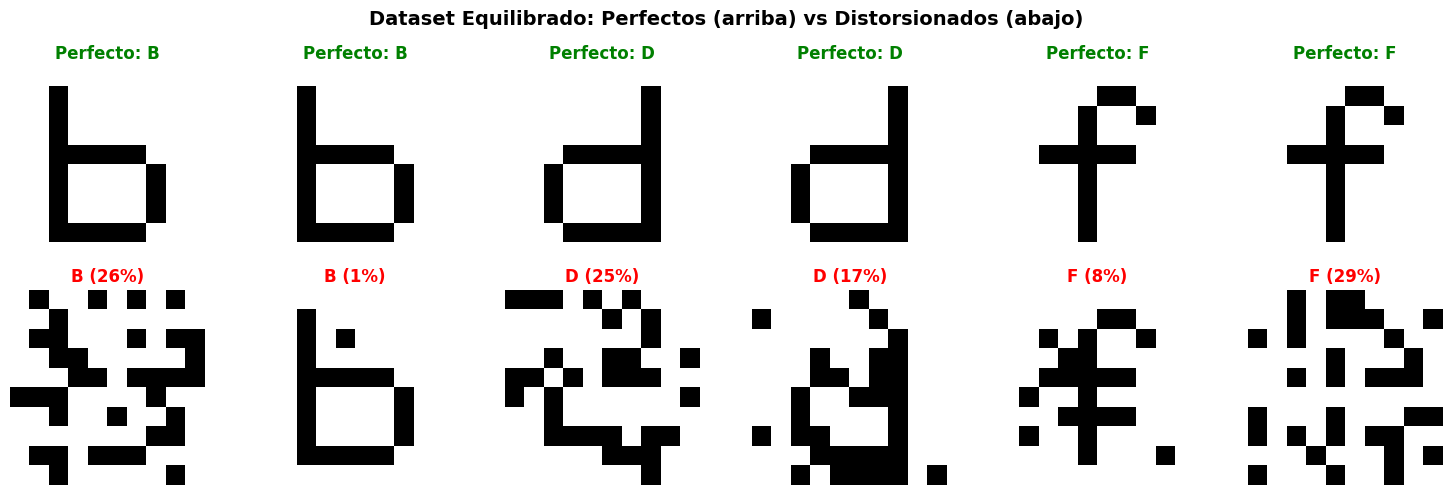


✅ Todos los ejemplos mostrados son datos REALES del dataset generado


In [400]:
# Visualizar comparación: ejemplos PERFECTOS vs DISTORSIONADOS del dataset
# Con el método equilibrado, el dataset YA incluye 10% de ejemplos perfectos

# 1. Identificar ejemplos perfectos (sin distorsión) y distorsionados del dataset
ejemplos_perfectos = {'B': [], 'D': [], 'F': []}
ejemplos_distorsionados = {'B': [], 'D': [], 'F': []}

for i in range(len(X_dist)):
    letra = letras_map[np.argmax(y_dist[i])]
    
    # Generar patrón perfecto de esa letra para comparar
    patron_perfecto = generador.generar_letra(letra)
    
    # Calcular distorsión
    distorsion = np.sum(X_dist[i] != patron_perfecto) / 100 * 100
    
    # Clasificar como perfecto o distorsionado
    if distorsion == 0:
        ejemplos_perfectos[letra].append(i)
    else:
        ejemplos_distorsionados[letra].append(i)

print("🔍 Análisis del dataset generado:")
print(f"   Total ejemplos: {len(X_dist)}")
for letra in ['B', 'D', 'F']:
    perfectos = len(ejemplos_perfectos[letra])
    distorsionados = len(ejemplos_distorsionados[letra])
    print(f"   {letra}: {perfectos} perfectos + {distorsionados} distorsionados = {perfectos + distorsionados}")

# 2. Visualizar: 3 perfectos (arriba) vs 3 distorsionados (abajo) por cada letra
fig, axes = plt.subplots(2, 6, figsize=(15, 5))

col = 0
for letra in ['B', 'D', 'F']:
    # Tomar 2 ejemplos de cada letra
    for j in range(2):
        # Fila superior: ejemplos PERFECTOS del dataset
        if len(ejemplos_perfectos[letra]) > j:
            idx_perfecto = ejemplos_perfectos[letra][j]
            axes[0, col].imshow(X_dist[idx_perfecto].reshape(10, 10), cmap='binary')
            axes[0, col].set_title(f'Perfecto: {letra}', color='green', fontweight='bold')
            axes[0, col].axis('off')
        
        # Fila inferior: ejemplos DISTORSIONADOS del dataset
        if len(ejemplos_distorsionados[letra]) > j:
            idx_dist = ejemplos_distorsionados[letra][j]
            patron_perfecto = generador.generar_letra(letra)
            distorsion = np.sum(X_dist[idx_dist] != patron_perfecto) / 100 * 100
            
            axes[1, col].imshow(X_dist[idx_dist].reshape(10, 10), cmap='binary')
            axes[1, col].set_title(f'{letra} ({distorsion:.0f}%)', color='red', fontweight='bold')
            axes[1, col].axis('off')
        
        col += 1

plt.suptitle('Dataset Equilibrado: Perfectos (arriba) vs Distorsionados (abajo)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n✅ Todos los ejemplos mostrados son datos REALES del dataset generado")

---
# 🧠 PARTE 2: Entrenamiento del MLP

## 🔄 Paso 6: Preparar Datos (Train/Validación)

Dividimos el dataset en dos conjuntos:
- **Entrenamiento (Train)**: Datos que el MLP usará para aprender (70%, 80% o 90%)
- **Validación (Val)**: Datos para evaluar el modelo sin haberlos visto antes (30%, 20% o 10%)

Esto nos permite detectar **overfitting** (memorización vs generalización).

In [401]:
from sklearn.model_selection import train_test_split

# ========================================
# CONFIGURACIÓN DE VALIDACIÓN
# ========================================

print("="*70)
print("⚙️  CONFIGURACIÓN DE TRAIN/VALIDACIÓN")
print("="*70)

# Opción: Modo interactivo o automático
MODO_INTERACTIVO_VAL = False  # Cambiar a True para elegir interactivamente

if MODO_INTERACTIVO_VAL:
    print("\n📊 Porcentaje para VALIDACIÓN:")
    print("   1️⃣  10% validación / 90% entrenamiento")
    print("   2️⃣  20% validación / 80% entrenamiento (recomendado)")
    print("   3️⃣  30% validación / 70% entrenamiento")
    
    opcion_val = input("\n¿Qué split deseas usar? (1/2/3) [default=2]: ").strip()
    
    if opcion_val == "1":
        porcentaje_validacion = 0.10
    elif opcion_val == "3":
        porcentaje_validacion = 0.30
    else:
        porcentaje_validacion = 0.20  # Por defecto
else:
    # Modo automático
    porcentaje_validacion = 0.20  # 20% validación, 80% entrenamiento

print(f"\n✅ Split seleccionado:")
print(f"   📦 Validación:    {int(porcentaje_validacion*100)}%")
print(f"   📦 Entrenamiento: {int((1-porcentaje_validacion)*100)}%")
print("="*70)

⚙️  CONFIGURACIÓN DE TRAIN/VALIDACIÓN

✅ Split seleccionado:
   📦 Validación:    20%
   📦 Entrenamiento: 80%


**Nota**: Puedes cambiar `MODO_INTERACTIVO_VAL = False` y el valor de `porcentaje_validacion` (0.10, 0.20 o 0.30) para usar diferentes splits.

### 🔀 Dividir los datos manteniendo proporción de clases

In [ ]:
print(f"\n🔀 Dividiendo datos...")
print(f"   Total de ejemplos: {len(X_dist)}")

# Dividir datos manteniendo proporción de clases (estratificación)
# stratify asegura que B, D y F mantengan la misma proporción en ambos conjuntos
X_train, X_val, y_train, y_val = train_test_split(
    X_dist, y_dist,
    test_size=porcentaje_validacion,
    random_state=SEED,  # Usa semilla configurada al inicio
    stratify=np.argmax(y_dist, axis=1)  # Mantener proporción B/D/F
)

# Mezclar solo el conjunto de entrenamiento (validación se deja sin mezclar)
np.random.seed(SEED)  # Usa semilla configurada
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

print(f"\n✅ Datos divididos exitosamente:")
print(f"   - Entrenamiento: {len(X_train)} ejemplos ({(1-porcentaje_validacion)*100:.0f}%)")
print(f"   - Validación:    {len(X_val)} ejemplos ({porcentaje_validacion*100:.0f}%)")
print(f"   - Semilla usada: {SEED} (reproducible)")

# Verificar distribución por letra en cada conjunto
print(f"\n📊 Distribución por letra:")
print(f"\n   ENTRENAMIENTO:")
for i, letra in enumerate(['B', 'D', 'F']):
    count = np.sum(np.argmax(y_train, axis=1) == i)
    print(f"      {letra}: {count} ejemplos ({count/len(y_train)*100:.1f}%)")

print(f"\n   VALIDACIÓN:")
for i, letra in enumerate(['B', 'D', 'F']):
    count = np.sum(np.argmax(y_val, axis=1) == i)
    print(f"      {letra}: {count} ejemplos ({count/len(y_val)*100:.1f}%)")

print(f"\n✅ Datasets de Train y Val listos para entrenar!")


🔀 Dividiendo datos...
   Total de ejemplos: 100

✅ Datos divididos exitosamente:
   - Entrenamiento: 80 ejemplos (80%)
   - Validación:    20 ejemplos (20%)
   - Semilla usada: 42 (reproducible)

📊 Distribución por letra:

   ENTRENAMIENTO:
      B: 26 ejemplos (32.5%)
      D: 27 ejemplos (33.8%)
      F: 27 ejemplos (33.8%)

   VALIDACIÓN:
      B: 7 ejemplos (35.0%)
      D: 6 ejemplos (30.0%)
      F: 7 ejemplos (35.0%)

✅ Datasets de Train y Val listos para entrenar!


### 📊 Visualización de la división

Ahora tenemos dos conjuntos de datos independientes:

```
Dataset Original (100 ejemplos)
        ↓
   ┌────┴────┐
   ↓         ↓
Train(80)  Val(20)
   ↓         ↓
Entrena    Evalúa
el MLP     sin ver
```

**¿Por qué es importante?**
- **Train**: El MLP aprende de estos datos (ajusta pesos)
- **Val**: El MLP NO ve estos datos durante el entrenamiento
- Comparando los errores en ambos podemos detectar **overfitting** (memorización)

## 🏗️ Paso 7: Crear MLP

### 🆕 Nueva API disponible!

Ahora puedes crear el MLP de **3 formas diferentes**:

**Opción 1 - API Clásica (retrocompatible):**
```python
MLP(capas_ocultas=[10], learning_rate=0.1, momentum=0.9)
```

**Opción 2 - API Nueva (1 capa oculta):**
```python
MLP(capas_ocultas=1, cantidad_neuronas=8, learning_rate=0.4, momentum=0.6)
```

**Opción 3 - API Nueva (2 capas ocultas):**
```python
MLP(capas_ocultas=2, cantidad_neuronas1=8, cantidad_neuronas2=6, 
    learning_rate=0.2, momentum=0.3)
```

💡 **Restricciones**: 
- `cantidad_neuronas` debe estar entre **5 y 10**
- `learning_rate` entre **0 y 1**
- `momentum` entre **0 y 1**

In [403]:
# ========================================
# OPCIÓN 1: API Clásica (lista)
# ========================================
# mlp = MLP(
#     capas_ocultas=[10],  # 1 capa oculta con 10 neuronas
#     learning_rate=0.1,
#     momentum=0.9
# )

# ========================================
# OPCIÓN 2: API Nueva - 1 capa oculta
# ========================================
mlp = MLP(
    capas_ocultas=1,
    cantidad_neuronas=8,  # 5-10 neuronas
    learning_rate=0.4,
    momentum=0.6
)

# ========================================
# OPCIÓN 3: API Nueva - 2 capas ocultas
# ========================================
# mlp = MLP(
#     capas_ocultas=2,
#     cantidad_neuronas1=8,   # 5-10 neuronas en capa 1
#     cantidad_neuronas2=6,   # 5-10 neuronas en capa 2
#     learning_rate=0.2,
#     momentum=0.3
# )

print("✅ MLP creado con tu nueva API")
print(f"   Arquitectura: 100 → {' → '.join(map(str, mlp.capas_ocultas))} → 3")
print("   Activaciones: Lineal (oculta) | Sigmoidal (salida)")


✅ MLP creado con arquitectura: [100, 8, 3]
   Capas ocultas: [8] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6, Épocas: 100
✅ MLP creado con tu nueva API
   Arquitectura: 100 → 8 → 3
   Activaciones: Lineal (oculta) | Sigmoidal (salida)


---
# 🔬 PARTE 2B: Entrenamiento con Validación

Vamos a entrenar el MLP usando **validación** para detectar overfitting.

### ¿Qué es validación?
- **Conjunto de entrenamiento**: Datos que el modelo usa para aprender
- **Conjunto de validación**: Datos que el modelo **NO ve** durante el entrenamiento
- Se evalúa en ambos conjuntos para detectar si el modelo **memoriza** (overfitting) o **aprende** (generalización)

### ¿Qué es overfitting?
- El modelo se ajusta **demasiado** a los datos de entrenamiento
- Funciona muy bien en entrenamiento pero **mal** en validación
- Señal: Gap grande entre error de entrenamiento y validación

## 🔀 Paso 8B: Dividir datos en Train/Validación

In [ ]:
from sklearn.model_selection import train_test_split

# Configurar split de validación
porcentaje_validacion = 0.20  # 20% para validación, 80% para entrenamiento

# Dividir datos manteniendo proporción de clases (estratificación)
X_train, X_val, y_train, y_val = train_test_split(
    X_dist, y_dist,
    test_size=porcentaje_validacion,
    random_state=SEED,  # Usa semilla configurada al inicio
    stratify=np.argmax(y_dist, axis=1)  # Mantener proporción B/D/F
)

# Mezclar solo el conjunto de entrenamiento
np.random.seed(SEED)  # Usa semilla configurada
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

print(f"✅ Datos divididos:")
print(f"   - Total:         {len(X_dist)} ejemplos")
print(f"   - Entrenamiento: {len(X_train)} ejemplos ({(1-porcentaje_validacion)*100:.0f}%)")
print(f"   - Validación:    {len(X_val)} ejemplos ({porcentaje_validacion*100:.0f}%)")
print(f"   - Semilla:       {SEED} (reproducible)")
print(f"\n📊 Distribución por letra en validación:")
for i, letra in enumerate(['B', 'D', 'F']):
    count = np.sum(np.argmax(y_val, axis=1) == i)
    print(f"   - {letra}: {count} ejemplos")

✅ Datos divididos:
   - Total:         100 ejemplos
   - Entrenamiento: 80 ejemplos (80%)
   - Validación:    20 ejemplos (20%)
   - Semilla:       42 (reproducible)

📊 Distribución por letra en validación:
   - B: 7 ejemplos
   - D: 6 ejemplos
   - F: 7 ejemplos


## 🎯 Paso 9: Entrenar MLP CON Validación

In [405]:
# Crear MLP con la NUEVA API (1 capa oculta)
mlp_validacion = MLP(
    capas_ocultas=2,
    cantidad_neuronas1=6,
    cantidad_neuronas2=6,
    learning_rate=0.4,
    momentum=0.6,
    epochs=3
)

print(f"🏗️  Arquitectura: {mlp_validacion.arquitectura}")
print(f"\n🏃 Entrenando con validación...\n")

# Entrenar CON datos de validación
historial = mlp_validacion.entrenar(
    X_train, y_train,              # Datos de entrenamiento
    X_val=X_val, y_val=y_val,      # ← NUEVO: datos de validación
    
    verbose=True  # Mostrará ambos errores época por época
)

print(f"\n✅ Entrenamiento completado!")
print(f"   - Error train (inicial): {historial['train_loss'][0]:.6f}")
print(f"   - Error train (final):   {historial['train_loss'][-1]:.6f}")
print(f"   - Error val (inicial):   {historial['val_loss'][0]:.6f}")
print(f"   - Error val (final):     {historial['val_loss'][-1]:.6f}")
print(f"   - Gap final:             {historial['val_loss'][-1] - historial['train_loss'][-1]:.6f}")

✅ MLP creado con arquitectura: [100, 6, 6, 3]
   Capas ocultas: [6, 6] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6, Épocas: 3
🏗️  Arquitectura: [100, 6, 6, 3]

🏃 Entrenando con validación...

Época 1/3 - Error Entrenamiento (MSE): 0.306609 - Error Validación (MSE): 0.243388
Época 2/3 - Error Entrenamiento (MSE): 0.221803 - Error Validación (MSE): 0.201482
Época 3/3 - Error Entrenamiento (MSE): 0.190888 - Error Validación (MSE): 0.181901

✅ Entrenamiento completado!
   - Error train (inicial): 0.306609
   - Error train (final):   0.190888
   - Error val (inicial):   0.243388
   - Error val (final):     0.181901
   - Gap final:             -0.008987


## 📊 Paso 10: Graficar MSE de Entrenamiento vs Validación

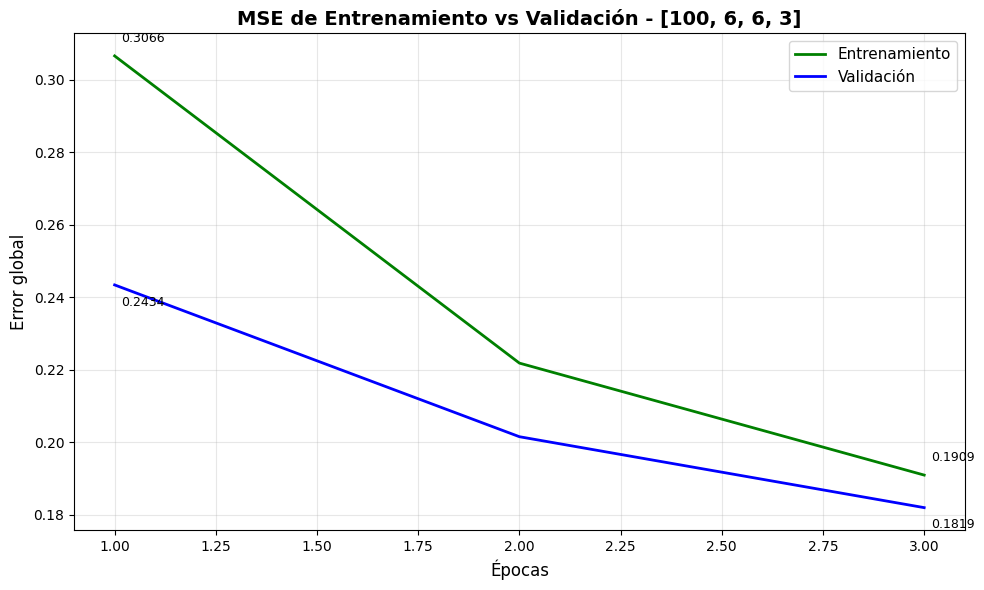

In [408]:
from visualizador import graficar_mse_entrenamiento_validacion, imprimir_resumen_entrenamiento

# Graficar las curvas MSE
graficar_mse_entrenamiento_validacion(
    historial,
    titulo=f"MSE de Entrenamiento vs Validación - {mlp_validacion.arquitectura}"
)

## 🔍 Paso 11: Análisis de Overfitting

In [409]:
# Imprimir resumen completo con análisis
imprimir_resumen_entrenamiento(historial)


📊 RESUMEN DEL ENTRENAMIENTO

📉 Error Entrenamiento:
   - Inicial: 0.306609
   - Final:   0.190888
   - Mejora:  37.74%

📉 Error Validación:
   - Inicial: 0.243388
   - Final:   0.181901
   - Mejora:  25.26%

🎯 Análisis:
   - Gap (val - train): -0.008987
   - Estado: ✅ EXCELENTE
   - El modelo generaliza mejor de lo esperado



## 📈 Paso 12: Evaluar en Entrenamiento y Validación

In [410]:
clasificador_val = ClasificadorLetras(mlp_validacion)
letras_map = {0: 'B', 1: 'D', 2: 'F'}

# Evaluar en ENTRENAMIENTO
print("🔹 Evaluación en conjunto de ENTRENAMIENTO:")
aciertos_train = 0
for i in range(len(X_train)):
    resultado = clasificador_val.clasificar_patron(X_train[i])
    real = letras_map[np.argmax(y_train[i])]
    if resultado['letra'] == real:
        aciertos_train += 1

precision_train = (aciertos_train / len(X_train)) * 100
print(f"   Precisión: {precision_train:.2f}% ({aciertos_train}/{len(X_train)})")

# Evaluar en VALIDACIÓN
print("\n🔹 Evaluación en conjunto de VALIDACIÓN:")
aciertos_val = 0
for i in range(len(X_val)):
    resultado = clasificador_val.clasificar_patron(X_val[i])
    real = letras_map[np.argmax(y_val[i])]
    if resultado['letra'] == real:
        aciertos_val += 1

precision_val = (aciertos_val / len(X_val)) * 100
print(f"   Precisión: {precision_val:.2f}% ({aciertos_val}/{len(X_val)})")

# Análisis
print(f"\n📈 ANÁLISIS:")
print(f"   Diferencia: {abs(precision_train - precision_val):.2f}%")
if precision_train - precision_val > 10:
    print(f"   ⚠️  Posible overfitting (modelo memoriza en lugar de aprender)")
elif precision_val > precision_train:
    print(f"   ✅ Excelente! El modelo generaliza bien")
else:
    print(f"   ✅ Buen balance entre entrenamiento y validación")

🔹 Evaluación en conjunto de ENTRENAMIENTO:
   Precisión: 57.50% (46/80)

🔹 Evaluación en conjunto de VALIDACIÓN:
   Precisión: 65.00% (13/20)

📈 ANÁLISIS:
   Diferencia: 7.50%
   ✅ Excelente! El modelo generaliza bien


---
# 🧪 EXPERIMENTO: Comparar diferentes splits de validación

Ahora vamos a probar con **3 splits diferentes** (10%, 20%, 30%) para comparar resultados.

## 🔬 Paso 13: Comparar Splits (10%, 20%, 30%)

In [ ]:
from visualizador import graficar_comparacion_splits

# Diccionario para guardar resultados
resultados_splits = {}

# Probar con 3 splits diferentes
splits = [0.10, 0.20, 0.30]

for split in splits:
    print(f"\n{'='*70}")
    print(f"🔀 Entrenando con {int(split*100)}% validación...")
    print('='*70)
    
    # Dividir datos con semilla configurada
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_dist, y_dist,
        test_size=split,
        random_state=SEED,  # Usa semilla configurada
        stratify=np.argmax(y_dist, axis=1)
    )
    
    print(f"   Train: {len(X_train_split)} | Val: {len(X_val_split)}")
    
    # Crear y entrenar MLP
    mlp_split = MLP(
        capas_ocultas=1,
        cantidad_neuronas=8,
        learning_rate=0.4,
        momentum=0.6
    )
    
    # Entrenar (sin verbose para no saturar output)
    historial_split = mlp_split.entrenar(
        X_train_split, y_train_split,
        X_val=X_val_split, y_val=y_val_split,
        epochs=50,
        verbose=False  # Silencioso para no saturar
    )
    
    # Guardar resultados
    resultados_splits[f'{int(split*100)}%'] = historial_split
    
    # Imprimir resumen
    print(f"   Error train final: {historial_split['train_loss'][-1]:.6f}")
    print(f"   Error val final:   {historial_split['val_loss'][-1]:.6f}")
    print(f"   Gap:               {historial_split['val_loss'][-1] - historial_split['train_loss'][-1]:.6f}")

print(f"\n✅ Experimento completado con {len(splits)} splits diferentes!")
print(f"   Semilla usada: {SEED} (todos los splits son reproducibles)")


🔀 Entrenando con 10% validación...
   Train: 90 | Val: 10
✅ MLP creado con arquitectura: [100, 8, 3]
   Capas ocultas: [8] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6, Épocas: 100
   Error train final: 0.002586
   Error val final:   0.001633
   Gap:               -0.000953

🔀 Entrenando con 20% validación...
   Train: 80 | Val: 20
✅ MLP creado con arquitectura: [100, 8, 3]
   Capas ocultas: [8] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6, Épocas: 100
   Error train final: 0.002046
   Error val final:   0.030688
   Gap:               0.028642

🔀 Entrenando con 30% validación...
   Train: 70 | Val: 30
✅ MLP creado con arquitectura: [100, 8, 3]
   Capas ocultas: [8] (activación LINEAL)
   Capa de salida: 3 neuronas (activación SIGMOIDAL)
   Learning rate: 0.4, Momentum: 0.6, Épocas: 100
   Error train final: 0.001941
   Error val final:   0.024551
   Gap:   

## 📊 Paso 14: Visualizar Comparación de Splits

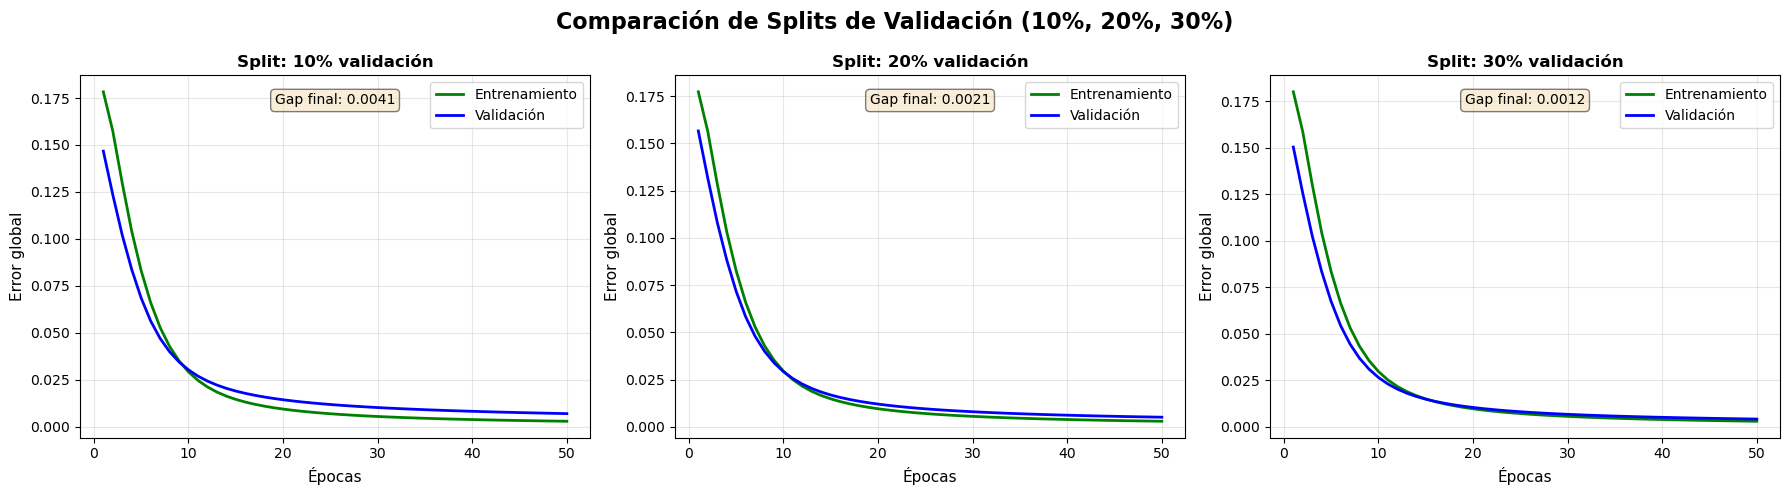

In [37]:
# Graficar las 3 comparaciones lado a lado
graficar_comparacion_splits(
    resultados_splits,
    titulo="Comparación de Splits de Validación (10%, 20%, 30%)"
)

## 🎯 Paso 8: Entrenar MLP (solo con datos de entrenamiento)

### 📝 Mejoras Implementadas en el MLP:

**1. API Simplificada:**
- Solo especificas capas ocultas: `MLP(capas_ocultas=[10])`
- Activaciones fijas: Lineal en ocultas, Sigmoidal en salida

**2. Funciones Optimizadas:**
- `backward_propagation()`: Calcula deltas con derivadas correctas
- `gradiente_descendente()`: Usa operaciones vectorizadas (100x más rápido)
- Implementación correcta del momento

**3. Monitoreo Mejorado:**
- Muestra **todas** las épocas (no cada 100)
- Numeración desde 1 (más intuitivo)

In [ ]:
print("🎯 Entrenando MLP con datos de ENTRENAMIENTO...")
print("="*60)
print(f"   Ejemplos de entrenamiento: {len(X_train)}")
print(f"   Arquitectura: 100 → {' → '.join(map(str, mlp.capas_ocultas))} → 3")
print("="*60)

# Entrenar SOLO con datos de entrenamiento (sin validación durante entrenamiento)
historial = mlp.entrenar(X_train, y_train, epochs=100, verbose=True)

print("="*60)
print(f"✅ Entrenamiento completado!")
print(f"   Error inicial: {historial[0]:.6f}")
print(f"   Error final: {historial[-1]:.6f}")
print(f"   Reducción: {((historial[0]-historial[-1])/historial[0]*100):.2f}%")


🎯 Entrenando...
Época 1/100 - Error (MSE): 0.177279
Época 2/100 - Error (MSE): 0.156280
Época 3/100 - Error (MSE): 0.128619
Época 4/100 - Error (MSE): 0.103307
Época 5/100 - Error (MSE): 0.082577
Época 6/100 - Error (MSE): 0.065879
Época 7/100 - Error (MSE): 0.052812
Época 8/100 - Error (MSE): 0.042849
Época 9/100 - Error (MSE): 0.035248
Época 10/100 - Error (MSE): 0.029406
Época 11/100 - Error (MSE): 0.024907
Época 12/100 - Error (MSE): 0.021424
Época 13/100 - Error (MSE): 0.018694
Época 14/100 - Error (MSE): 0.016520
Época 15/100 - Error (MSE): 0.014762
Época 16/100 - Error (MSE): 0.013321
Época 17/100 - Error (MSE): 0.012125
Época 18/100 - Error (MSE): 0.011118
Época 19/100 - Error (MSE): 0.010261
Época 20/100 - Error (MSE): 0.009524
Época 21/100 - Error (MSE): 0.008882
Época 22/100 - Error (MSE): 0.008320
Época 23/100 - Error (MSE): 0.007823
Época 24/100 - Error (MSE): 0.007381
Época 25/100 - Error (MSE): 0.006984
Época 26/100 - Error (MSE): 0.006627
Época 27/100 - Error (MSE): 0.0

## ? Paso 9: Evaluar en Entrenamiento vs Validación

🔍 Evaluando MLP en ambos conjuntos...

📦 CONJUNTO DE ENTRENAMIENTO:
   Precisión:  82.50% (66/80)
   MSE Promedio: 0.162096

📦 CONJUNTO DE VALIDACIÓN:
   Precisión:  70.00% (14/20)
   MSE Promedio: 0.195112

📊 ANÁLISIS COMPARATIVO:

🎯 PRECISIÓN:
   Entrenamiento: 82.50%
   Validación:    70.00%
   Diferencia:    12.50%

📉 ERROR (MSE):
   Entrenamiento: 0.162096
   Validación:    0.195112
   Diferencia:    0.033016

💡 DIAGNÓSTICO:
   ⚠️  OVERFITTING LEVE: Hay algo de memorización

📊 Generando gráficas comparativas...


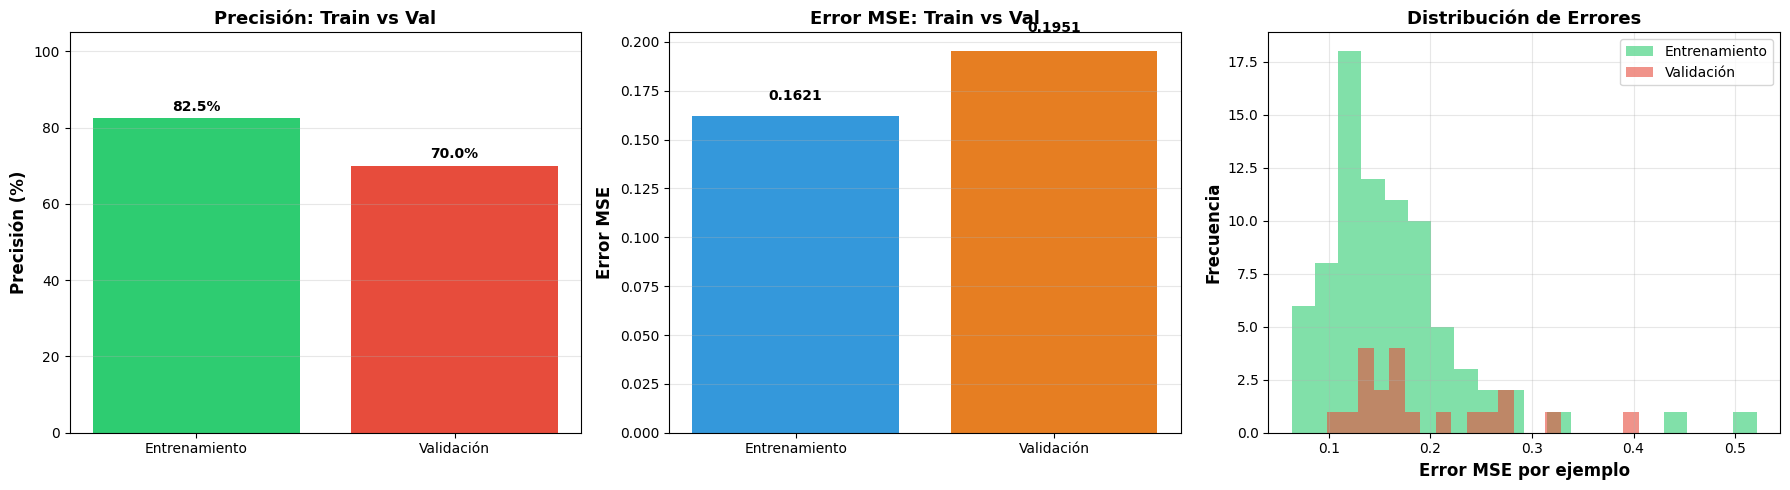


✅ Evaluación completada!


In [412]:
print("🔍 Evaluando MLP en ambos conjuntos...")
print("="*60)

# Crear clasificador
clasificador = ClasificadorLetras(mlp)

# ========================================
# 1. EVALUAR EN ENTRENAMIENTO
# ========================================
print("\n📦 CONJUNTO DE ENTRENAMIENTO:")
aciertos_train = 0
errores_train = []

for i in range(len(X_train)):
    # Predicción
    resultado = clasificador.clasificar_patron(X_train[i])
    pred = resultado['letra']
    
    # Real
    real = letras_map[np.argmax(y_train[i])]
    
    # Verificar
    if pred == real:
        aciertos_train += 1
    
    # Calcular error MSE para este ejemplo
    salida = mlp.forward_propagation(X_train[i])
    error_mse = np.mean((y_train[i] - salida) ** 2)
    errores_train.append(error_mse)

precision_train = (aciertos_train / len(X_train)) * 100
mse_train = np.mean(errores_train)

print(f"   Precisión:  {precision_train:.2f}% ({aciertos_train}/{len(X_train)})")
print(f"   MSE Promedio: {mse_train:.6f}")

# ========================================
# 2. EVALUAR EN VALIDACIÓN
# ========================================
print("\n📦 CONJUNTO DE VALIDACIÓN:")
aciertos_val = 0
errores_val = []

for i in range(len(X_val)):
    # Predicción
    resultado = clasificador.clasificar_patron(X_val[i])
    pred = resultado['letra']
    
    # Real
    real = letras_map[np.argmax(y_val[i])]
    
    # Verificar
    if pred == real:
        aciertos_val += 1
    
    # Calcular error MSE para este ejemplo
    salida = mlp.forward_propagation(X_val[i])
    error_mse = np.mean((y_val[i] - salida) ** 2)
    errores_val.append(error_mse)

precision_val = (aciertos_val / len(X_val)) * 100
mse_val = np.mean(errores_val)

print(f"   Precisión:  {precision_val:.2f}% ({aciertos_val}/{len(X_val)})")
print(f"   MSE Promedio: {mse_val:.6f}")

# ========================================
# 3. ANÁLISIS COMPARATIVO
# ========================================
print("\n" + "="*60)
print("📊 ANÁLISIS COMPARATIVO:")
print("="*60)

diferencia_precision = precision_train - precision_val
diferencia_mse = mse_val - mse_train

print(f"\n🎯 PRECISIÓN:")
print(f"   Entrenamiento: {precision_train:.2f}%")
print(f"   Validación:    {precision_val:.2f}%")
print(f"   Diferencia:    {abs(diferencia_precision):.2f}%")

print(f"\n📉 ERROR (MSE):")
print(f"   Entrenamiento: {mse_train:.6f}")
print(f"   Validación:    {mse_val:.6f}")
print(f"   Diferencia:    {diferencia_mse:.6f}")

print(f"\n💡 DIAGNÓSTICO:")
if diferencia_precision > 15:
    print("   ⚠️  OVERFITTING SEVERO: El modelo memorizó los datos de entrenamiento")
elif diferencia_precision > 5:
    print("   ⚠️  OVERFITTING LEVE: Hay algo de memorización")
elif precision_val > precision_train:
    print("   ✅ EXCELENTE: El modelo generaliza mejor de lo esperado")
else:
    print("   ✅ BUEN BALANCE: El modelo aprendió correctamente")

# ========================================
# 4. GRÁFICA COMPARATIVA
# ========================================
print("\n📊 Generando gráficas comparativas...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfica 1: Precisión
axes[0].bar(['Entrenamiento', 'Validación'], 
            [precision_train, precision_val],
            color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Precisión (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Precisión: Train vs Val', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 105])
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([precision_train, precision_val]):
    axes[0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Gráfica 2: Error MSE
axes[1].bar(['Entrenamiento', 'Validación'], 
            [mse_train, mse_val],
            color=['#3498db', '#e67e22'])
axes[1].set_ylabel('Error MSE', fontsize=12, fontweight='bold')
axes[1].set_title('Error MSE: Train vs Val', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([mse_train, mse_val]):
    axes[1].text(i, v + v*0.05, f'{v:.4f}', ha='center', fontweight='bold')

# Gráfica 3: Histograma de errores por ejemplo
axes[2].hist(errores_train, bins=20, alpha=0.6, label='Entrenamiento', color='#2ecc71')
axes[2].hist(errores_val, bins=20, alpha=0.6, label='Validación', color='#e74c3c')
axes[2].set_xlabel('Error MSE por ejemplo', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[2].set_title('Distribución de Errores', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Evaluación completada!")


---
# 🎛️ PARTE 3: Clasificación y Evaluación

## 🎨 Paso 10: Crear Clasificador

In [45]:
clasificador = ClasificadorLetras(mlp)
print("✅ Clasificador creado")

✅ Clasificador creado


## 🧪 Paso 11: Evaluar Precisión

In [47]:
aciertos = 0
for i in range(len(X_dist)):
    resultado = clasificador.clasificar_patron(X_dist[i])
    pred = resultado['letra']
    real = letras_map[np.argmax(y_dist[i])]
    if pred == real:
        aciertos += 1

precision = (aciertos / len(X_dist)) * 100
print(f"✅ Precisión: {precision:.2f}%")
print(f"   Aciertos: {aciertos}/{len(X_dist)}")

✅ Precisión: 100.00%
   Aciertos: 500/500


## 🔍 Paso 12: Visualizar Predicciones

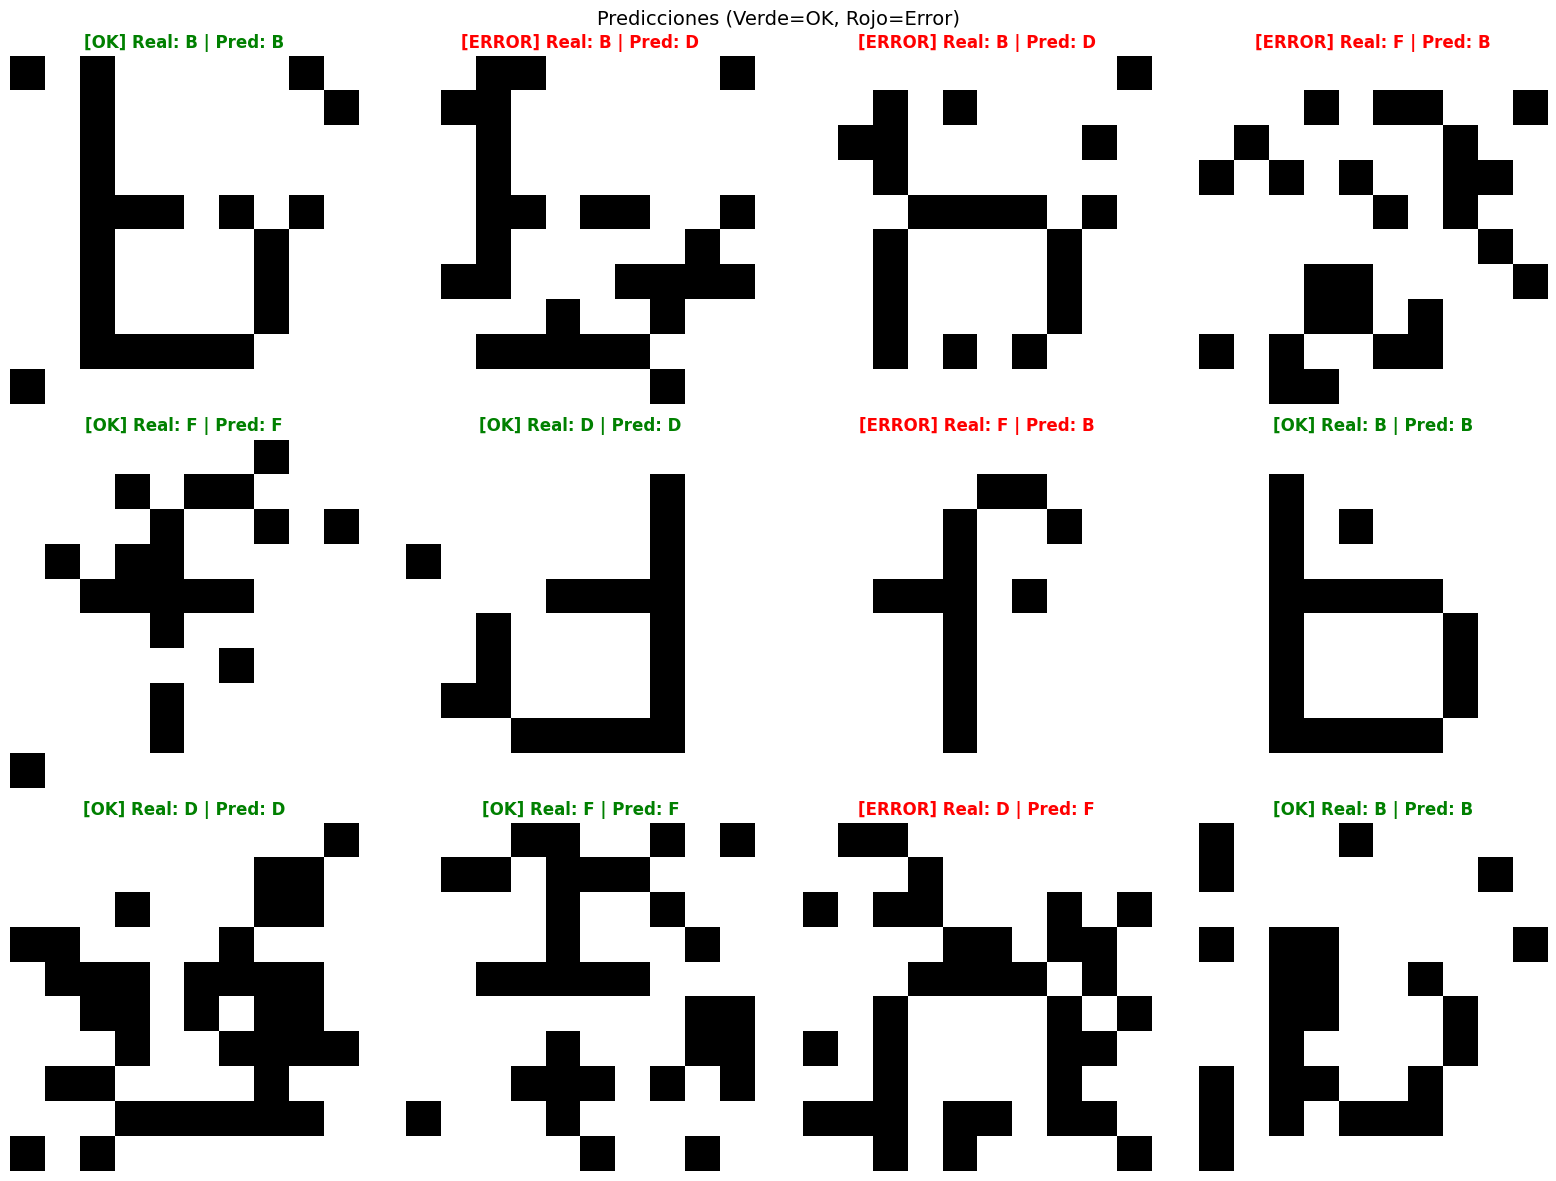

In [413]:
indices_random = np.random.choice(len(X_dist), 12, replace=False)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, i in enumerate(indices_random):
    resultado = clasificador.clasificar_patron(X_dist[i])
    pred = resultado['letra']
    real = letras_map[np.argmax(y_dist[i])]
    correcto = "[OK]" if pred == real else "[ERROR]"
    color = 'green' if pred == real else 'red'
    
    axes[idx].imshow(X_dist[i].reshape(10, 10), cmap='binary')
    axes[idx].set_title(f'{correcto} Real: {real} | Pred: {pred}', 
                        color=color, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Predicciones (Verde=OK, Rojo=Error)', fontsize=14)
plt.tight_layout()
plt.show()

## 🎯 Paso 13: Probar Robustez

In [51]:
print("🧪 Probando robustez...")
print("="*60)

for letra in ['B', 'D', 'F']:
    print(f"\n📝 Letra {letra}:")
    clasificador.probar_distorsiones(
        letra=letra,
        distorsiones=[0, 5, 10, 15, 20, 25, 30]
    )

print("\n" + "="*60)

🧪 Probando robustez...

📝 Letra B:

🔍 Probando clasificación de letra 'B' con diferentes distorsiones:
✅ Distorsión  0% → Predicción: B (Confianza: 99.7%)
✅ Distorsión  5% → Predicción: B (Confianza: 99.7%)
✅ Distorsión 10% → Predicción: B (Confianza: 99.8%)
✅ Distorsión 15% → Predicción: B (Confianza: 67.7%)
✅ Distorsión 20% → Predicción: B (Confianza: 90.2%)
✅ Distorsión 25% → Predicción: B (Confianza: 91.5%)
❌ Distorsión 30% → Predicción: D (Confianza: 88.3%)

📝 Letra D:

🔍 Probando clasificación de letra 'D' con diferentes distorsiones:
✅ Distorsión  0% → Predicción: D (Confianza: 99.7%)
✅ Distorsión  5% → Predicción: D (Confianza: 99.7%)
✅ Distorsión 10% → Predicción: D (Confianza: 99.4%)
✅ Distorsión 15% → Predicción: D (Confianza: 98.6%)
✅ Distorsión 20% → Predicción: D (Confianza: 99.6%)
✅ Distorsión 25% → Predicción: D (Confianza: 94.8%)
❌ Distorsión 30% → Predicción: F (Confianza: 29.7%)

📝 Letra F:

🔍 Probando clasificación de letra 'F' con diferentes distorsiones:
✅ Distors

## 📈 Paso 14: Gráfica de Robustez

In [53]:
resultados = clasificador.evaluar_robustez(
    distorsiones=[0, 5, 10, 15, 20, 25, 30],
    num_pruebas_por_letra=50
)

plt.figure(figsize=(12, 7))
plt.plot(resultados['distorsiones'], resultados['precision_B'], 'o-', label='B', linewidth=2)
plt.plot(resultados['distorsiones'], resultados['precision_D'], 's-', label='D', linewidth=2)
plt.plot(resultados['distorsiones'], resultados['precision_F'], '^-', label='F', linewidth=2)
plt.plot(resultados['distorsiones'], resultados['precision_global'], 'D-', 
         label='Global', linewidth=3, color='black')

plt.xlabel('Distorsión (%)', fontsize=12, fontweight='bold')
plt.ylabel('Precisión (%)', fontsize=12, fontweight='bold')
plt.title('Robustez del Modelo', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0, 105])
plt.tight_layout()
plt.show()

TypeError: ClasificadorLetras.evaluar_robustez() got an unexpected keyword argument 'distorsiones'

## 💾 Paso 15: Guardar Modelo

In [ ]:
nombre = 'modelo_completo.json'
clasificador.guardar_modelo(nombre)
print(f"💾 Modelo guardado: {nombre}")

## 🆕 Nuevo: Distorsionador (Intercambio inteligente 1s→0s)

A partir de ahora, `GeneradorDataset` incluye integración con la clase **Distorsionador**, que ofrece un método más realista de distorsión:

### Diferencias entre métodos:

| Característica | `aplicar_distorsion` (clásico) | `generar_data_distorsionadas_v2` (nuevo) |
|----------------|-------------------------------|------------------------------------------|
| Operación | Inversión aleatoria (0↔1) | Intercambio inteligente (1s→0s) |
| Realismo | Puede crear nuevos píxeles activos | Solo degrada píxeles existentes |
| Control | % fijos de sin distorsión | Automático 10% sin distorsión |
| Uso típico | Datos sintéticos genéricos | Degradación visual realista |

### Ejemplo de uso:

In [ ]:
# Generar dataset con Distorsionador
generador_v2 = GeneradorDataset()

# Opción 1: Dataset específico con rango de distorsión personalizado
generador_v2.generar_data_distorsionadas_v2(
    cant=100, 
    min_distorsion=5.0,   # Mínimo 5% de distorsión
    max_distorsion=25.0   # Máximo 25% de distorsión
)

# Opción 2: Generar todos los datasets (100, 500, 1000) con Distorsionador
# generador_v2.generar_todos_los_datasets(usar_distorsionador_v2=True)

### Ventajas del Distorsionador:

✅ **Más realista**: Solo degrada (elimina) píxeles activos, no crea nuevos  
✅ **Automático**: Mantiene siempre 10% de datos sin distorsión  
✅ **Controlable**: Define rangos min/max de distorsión por letra  
✅ **Preserva etiquetas**: Las 3 últimas posiciones (B, D, F) nunca se modifican  
✅ **Mejor para visión**: Simula degradación real de imágenes/patrones